# Integrais de superficie

O cálculo de integrais de superficie é moi semellante ao cálculo feito para as integrais de liña, coa única diferenza de incorporar unha dimensión máis nos cálculos. Agora, o dominio de integración será unha porción dunha superficie no espazo tridimendional. Para realizar estes cálculos, seguiremos usando o módulo **Sympy**. Ademais, destes cálculos integrais, tamén revisaremos como representar graficamente unha superficie, estudo que xa foi realizado na *práctica 4*.

Nesta práctica volveremos a usar o módulo **Sympy** e **Matplotlib** tanto para calcular integrais como para representar as superficies que serán usadas como dominio de integración.


## Obxectivos

- Representación gráfica de superficies (**repaso**)
- Parametrización de superficies
- Cálculo de integrais de liña


# Superficies

Como xa fixemos en prácticas anteriores, para usar os módulos **Numpy**, **Matplotlib** e **Sympy**, o primeiro que debemos facer é importalos, e posto que usaremos este módulo usando a interface `pyplot` de **Matplotlib**, tamén haberá que importar esta. 

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sympy as sp
sp.init_printing(use_latex='mathjax')
%matplotlib inline

## Representación gráfica de superficies (repaso)
Un dos casos *particulares* de superficie no espazo tridimensional son aquelas superficies que se poden definir como:
$$
\text{Superficie}=\{(x,y,z)\in\mathbb{R}^3:\ z=f(x,y)\text{ con }(x,y)\in\mathcal{R}\},
$$
onde $\mathcal{R}$ é un recinto do plano $XY$ (que eventualmente podería ser todo $\mathbb{R}^2$). 

Por exemplo, para representar o cilíndro $y^2+z^2=5^2$ no primeiro octante entre os planos $x=0$ e $x=4$ teríamos que primeiro despexar a coordenada $z$ como $z=+\sqrt{5^2-y^2}$ e polo tanto se representaría graficamente
$$
z=+\sqrt{5^2-y^2},\ (x,y)\in[0,4]\times[0,5]
$$
usando **Matplotlib**:

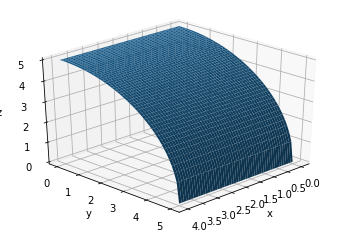

In [2]:
# Definición da función en sympy
x,y,z = sp.symbols('x y z', real=True)
f = sp.Lambda((x,y),sp.sqrt(5**2-y**2))
f_np = sp.lambdify((x,y),f(x,y),"numpy")

N = 50  # 50 puntos en cada dirección dos eixes cartesianos
x = np.linspace(0.,4., N)
y = np.linspace(0., 5., N)

X, Y = np.meshgrid(x, y)
Z = f_np(X, Y)

from mpl_toolkits.mplot3d import axes3d
# Creación da figura 3D
fig = plt.figure()
ax = plt.axes(projection="3d")
# Representación da superficie z=f(x,y)
surf = ax.plot_surface(X, Y, Z)  
# Etiquetas dos eixes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# Punto de vista do observador: elevación
ax.view_init(azim=45)
plt.show()

## Parametrización de superficies
De forma análoga a como se parametrizan curvas no espazo tridimensional, tamén se podne parametrizazr superficies tendo en conta que agora non soamente se da un único parámetro $t$ como nas curvas, senón que hai que dar dous novos parámetros $t$ e $s$:
$$
\text{Superficie}=\{(x,y,z)\in\mathbb{R}^3:\ x=\alpha(t,s),\ y=\beta(t,s),\ z=\gamma(t,s)\text{ con }t\in[t_0,t_1],\ s\in[s_0,s_1]\},
$$
onde $t$ e $s$ son os parámetros da representación da supercicie.

Por exemplo, para representar graficamente a sección do cilíndro antes descrita, poderíamos introducir como parámetros $t=\theta$ e $s=x$ onde $\theta$ é o ángulo formado polo vector posición do punto $(y,z)$ medido respecto ao eixo $y$. Deste xeito:
$$
x=f(t,s)=s,\qquad y=g(t,s)=5\cos(t),\qquad z=h(t,s)=5\sin(t)
$$
con $t\in[0,\pi/2]$ e $s\in[0,4]$. Para usar esta parametrización para realizar a representación gráfica, tamén usaríamos **Matplotlib**:

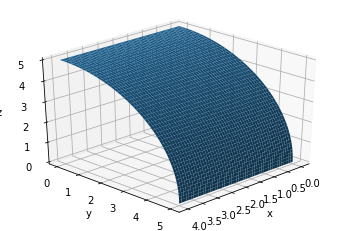

In [3]:
# Definición da función en sympy
t, s = sp.symbols('t s', real=True)
alpha = sp.Lambda((t,s),s)
beta = sp.Lambda((t,s),5*sp.cos(t))
gamma = sp.Lambda((t,s),5*sp.sin(t))
alpha_np = sp.lambdify((t,s),alpha(t,s),"numpy")
beta_np = sp.lambdify((t,s),beta(t,s),"numpy")
gamma_np = sp.lambdify((t,s),gamma(t,s),"numpy")

N = 50  # 50 puntos en cada dirección dos eixes cartesianos
t = np.linspace(0., np.pi/2., N)
s = np.linspace(0., 4., N)

T, S = np.meshgrid(t, s)
X = alpha_np(T, S)
Y = beta_np(T, S)
Z = gamma_np(T, S)

from mpl_toolkits.mplot3d import axes3d
# Creación da figura 3D
fig = plt.figure()
ax = plt.axes(projection="3d")
# Representación da superficie parametrizada
surf = ax.plot_surface(X, Y, Z)  
# Etiquetas dos eixes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# Punto de vista do observador: elevación
ax.view_init(azim=45)
plt.show()

### Exercicio 12.1
Calcula con **Sympy** e representa graficamente con **Matplotlib** os vectores normais á porción de superficie do cilindro antes descrito usando:
- A descripción da superficie como $z=f(x,y)$
- A descripción paramétrica da superficie

In [4]:
## O TEU CÓDIGO AQUÍ

# Cálculo de integrais de superficie

O cálculo dunha integral de superficie descrita por $z=f(x,y)$ non deixa de ser unha integral calculada sobre unha rexión $\mathcal{R}$ de dúas variables no plano $XY$, isto é,
$$
\int_{\mathcal{S}}F(x,y,z)dS=\int_{\mathcal{R}}F(x,y,f(x,y))||\vec{n}(x,y)||dxdy.
$$
onde $\vec{n}(x,y)$ é o vector normal oa superficie no punto $(x,y,f(x,y))\in\mathcal{S}$. Como xa estudamos no tema 3, o vector normal a unha superficie pode calcularse mediante o gradiente e resulta que
$$
||\vec{n}(x,y)||=\sqrt{1+\left(\frac{\partial f}{\partial x}(x,y)\right)^2+\left(\frac{\partial f}{\partial y}(x,y)\right)^2}.
$$

Vexamos cun exemplo como realizaríamos o cálculo da integral de superficie no caso de 
$$
\int_{\mathcal{S}}(x+z)\,dS,
$$
onde $\mathcal{S}$ é a porción de cilíndro $y^2+z^2=5^2$ no primeiro octante e limitado polos planos $x=0$ e $x=4$.

In [5]:
x, y, z = sp.symbols('x y z', real=True)
gradient = lambda f, v: sp.transpose(sp.Matrix([f]).jacobian(v))
F = sp.Lambda((x,y,z), y)
# Función que define a superficie como z=f(x,y)
f = sp.Lambda((x,y),sp.sqrt(y**2-5**2))
# Cálculo do vector normal
n = gradient(z-f(x,y),(x,y,z))
display('Módulo do vector normal:',n.norm())
n_norm = sp.sqrt(1+y**2/(y**2-25))
display('Módulo do vector normal simplificado:',n_norm)
# Calculo da integral de liña
I = sp.integrate(F(x,y,f(x,y))*n_norm,(x,0,4),(y,0,5))
display('Integral de superficie:', I)

'Módulo do vector normal:'

       _____________________
      ╱               2     
     ╱  │     y      │      
    ╱   │────────────│  + 1 
   ╱    │   _________│      
  ╱     │  ╱  2      │      
╲╱      │╲╱  y  - 25 │      

'Módulo do vector normal simplificado:'

      _____________
     ╱     2       
    ╱     y        
   ╱   ─────── + 1 
  ╱     2          
╲╱     y  - 25     

'Integral de superficie:'

  5                               
  ⌠                               
  ⎮         ___________________   
  ⎮        ╱      2               
  ⎮       ╱    2⋅y        25      
4⋅⎮ y⋅   ╱   ─────── - ───────  dy
  ⎮     ╱     2         2         
  ⎮   ╲╱     y  - 25   y  - 25    
  ⌡                               
  0                               

# Cálculo de integrais de superficie paramétricas

O cálculo dunha integral de superficie descrita de forma paramétrica por $x=\alpha(t,s)$, $y=\beta(t,s)$ e $z=\gamma(t,s)$ non deixa de ser unha integral calculada sobre unha rexión $(t,s)\in\mathcal{R}$ de dúas variables, isto é,
$$
\int_{\mathcal{S}}F(x,y,z)dS=\int_{\mathcal{R}}F(\alpha(t,s),\beta(t,s),\gamma(t,s))||\vec{n}(t,s)||dtds.
$$
onde $\vec{n}(t,s)$ é o vector normal oa superficie no punto $(\alpha(t,s),\beta(t,s),\gamma(t,s))\in\mathcal{S}$. Para calcular o vector normal a unha superficie, nos valemos do produto vectorial de dous vectores tanxentes á superficie
$$
\vec{\tau}_{t}(t,s)=
\displaystyle\begin{pmatrix}
\frac{\partial\alpha}{\partial t}\\
\frac{\partial\beta}{\partial t}\\
\frac{\partial\gamma}{\partial t}\\
\end{pmatrix},
\qquad
\vec{\tau}_{s}(t,s)=
\displaystyle\begin{pmatrix}
\frac{\partial\alpha}{\partial s}\\
\frac{\partial\beta}{\partial s}\\
\frac{\partial\gamma}{\partial s}\\
\end{pmatrix},
$$
co que resulta
$$
\vec{n}(t,s)=\vec{\tau}_{t}(t,s)\times\vec{\tau}_{s}(t,s).
$$

Vexamos cun exemplo como realizaríamos o cálculo da integral de superficie no caso de 
$$
\int_{\mathcal{S}}(x+z)\,dS,
$$
onde $\mathcal{S}$ é a porción de cilíndro $y^2+z^2=5^2$ no primeiro octante e limitado polos planos $x=0$ e $x=4$.

In [2]:
x, y, z, s, t = sp.symbols('x y z s t', real=True)
F = sp.Lambda((x,y,z), y)
# Función que define a superficie parametrica
S = sp.Lambda((t,s),sp.Matrix((s,5*sp.cos(t),5*sp.sin(t))))
# Cálculo do vector normal
tau_t = sp.diff(S(t,s),t)
tau_s = sp.diff(S(t,s),s)
n = tau_t.cross(tau_s)
display('Módulo do vector normal:',n.norm())
n_norm = sp.simplify(n.norm())
display('Módulo do vector normal simplificado:',n_norm)
# Calculo da integral de liña
I = sp.integrate(F(*S(t,s))*n_norm,(t,0,sp.pi/2),(s,0,4))
display('Integral de superficie:', I)

'Módulo do vector normal:'

   _________________________
  ╱       2            2    
╲╱  25⋅sin (t) + 25⋅cos (t) 

'Módulo do vector normal simplificado:'

5

'Integral de superficie:'

100

### Exercicio 12.2
Tendo en conta a porción do cilindro $\mathcal{S}$ descrita anteriormente, calcula a integral de superficie
$$
\int_{S}(x+z)dS,
$$
usando unha parametrización diferente á que aparece descrita nesta práctica.


In [5]:
x, y, z, s, t = sp.symbols('x y z s t', real=True)
F = sp.Lambda((x,y,z), x + z)
# Función que define a superficie parametrica
S = sp.Lambda((t,s),sp.Matrix((2*s,5*sp.sin(3*t),5*sp.cos(3*t))))
# Cálculo do vector normal
tau_t = sp.diff(S(t,s),t)
tau_s = sp.diff(S(t,s),s)
n = tau_t.cross(tau_s)
display('Módulo do vector normal:',n.norm())
n_norm = sp.simplify(n.norm())
display('Módulo do vector normal simplificado:',n_norm)
# Calculo da integral de liña
I = sp.integrate(F(*S(t,s))*n_norm,(t,0,sp.pi/6),(s,0,2))
display('Integral de superficie:', I)

'Módulo do vector normal:'

   _______________________________
  ╱        2               2      
╲╱  900⋅sin (3⋅t) + 900⋅cos (3⋅t) 

'Módulo do vector normal simplificado:'

30

'Integral de superficie:'

20⋅π + 100